In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

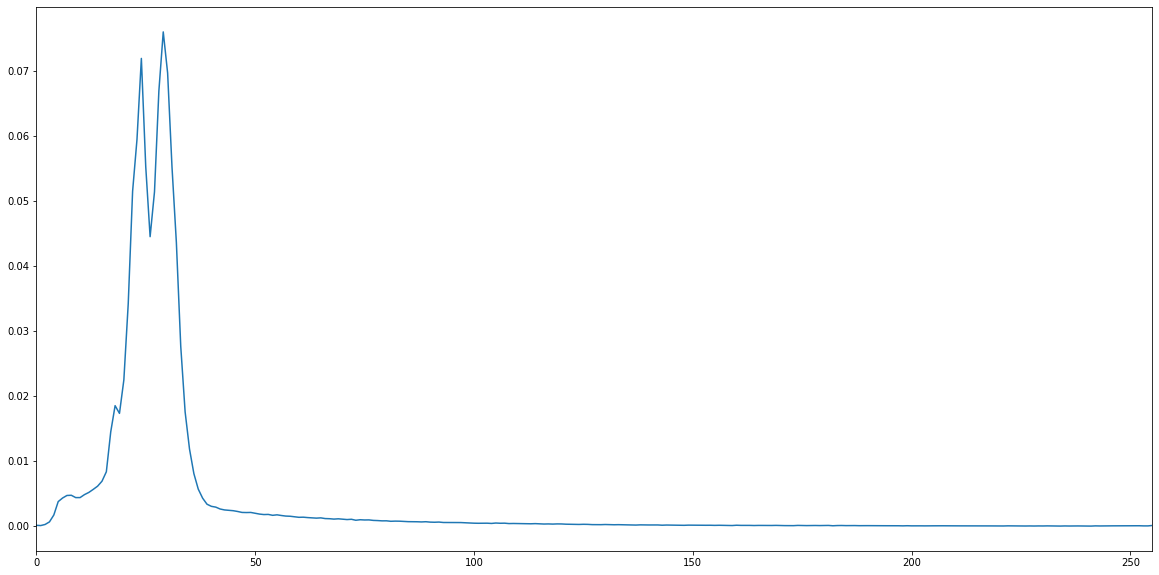

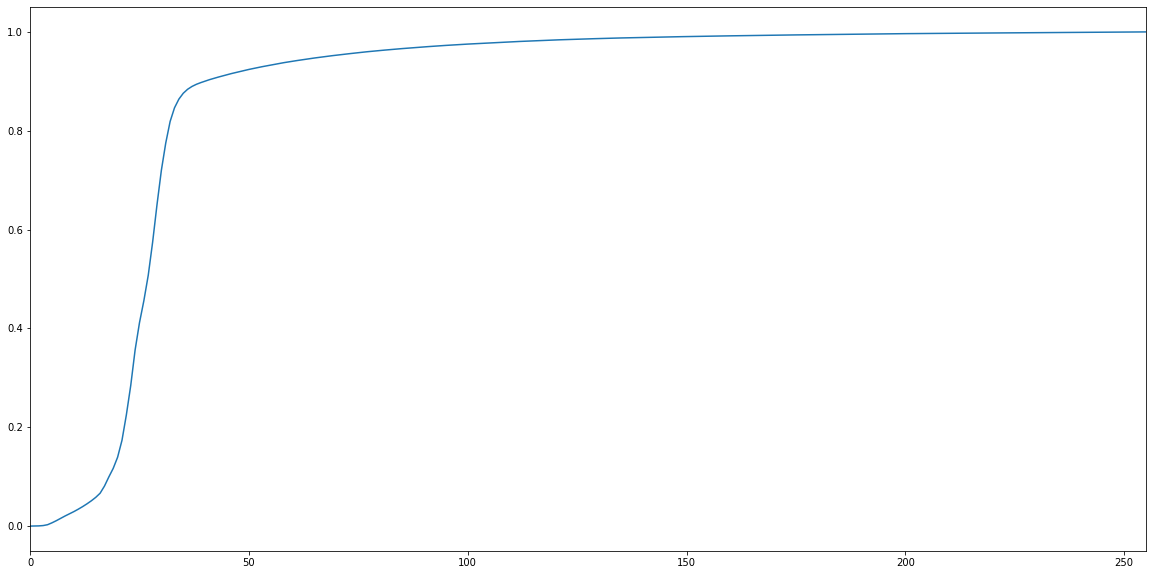

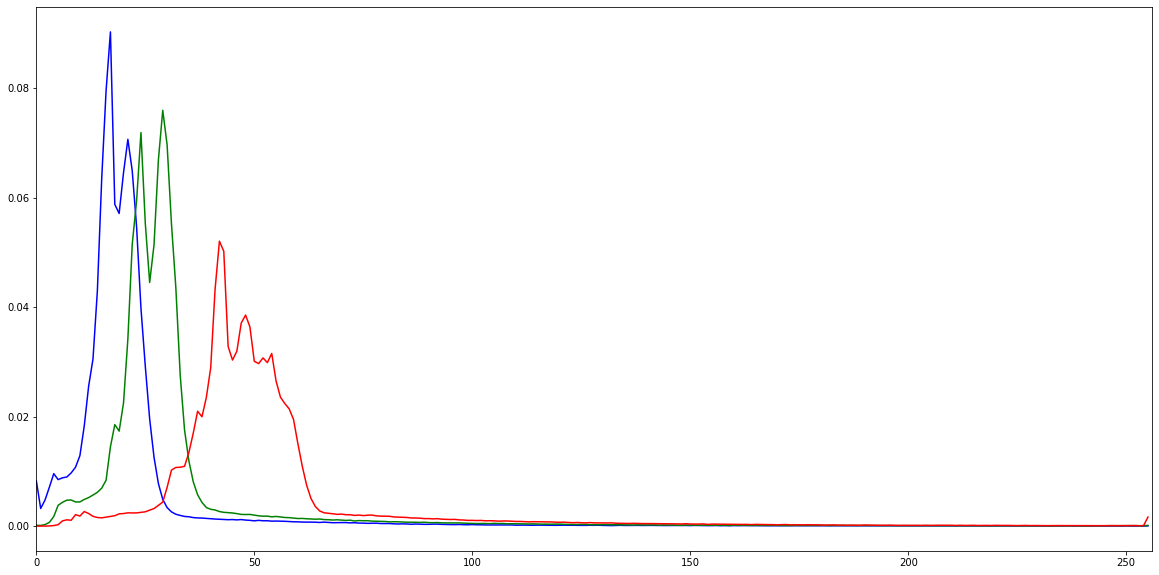

In [10]:
image = cv2.imread('./MasterOpenCV/images/input.jpg')

histogram = cv2.calcHist([image], [1], None, [256], [0,256])
histogram /= np.sum(histogram)
plt.figure(figsize=(20,10))
plt.plot(histogram)
plt.xlim([0,255])

for i in range(len(histogram)):
    if not i == 0:
        histogram[i] += histogram[i-1]
histogram /= histogram[-1]
plt.figure(figsize=(20,10))
plt.plot(histogram)
plt.xlim([0,255])

color = ('b', 'g', 'r')

plt.figure(figsize=(20,10))
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0,256])
    histogram /= np.sum(histogram)
    plt.plot(histogram, color = col)
    plt.xlim([0,256])
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

Cumulative Distribution Function

In [21]:
def cdf(image):
    
    histogram = cv2.calcHist([image], [0], None, [256], [0,256])
    histogram /= np.sum(histogram)
    
    for i in range(len(histogram)):
        if not i == 0:
            histogram[i] += histogram[i-1]
    histogram /= histogram[-1]
    plt.figure(figsize=(20,10))
    plt.plot(histogram)
    plt.xlim([0,255])

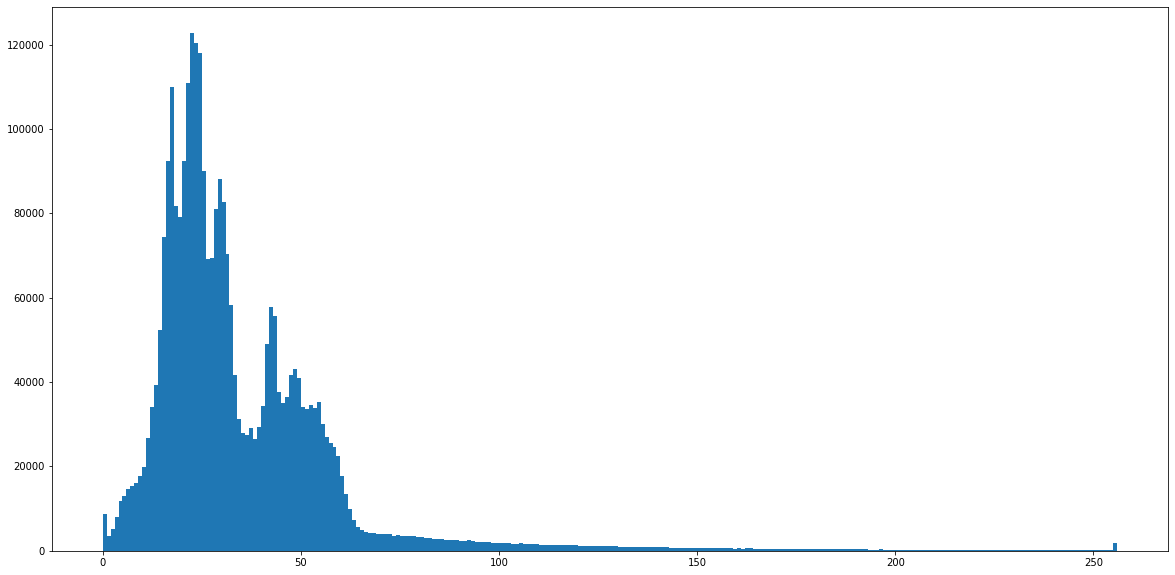

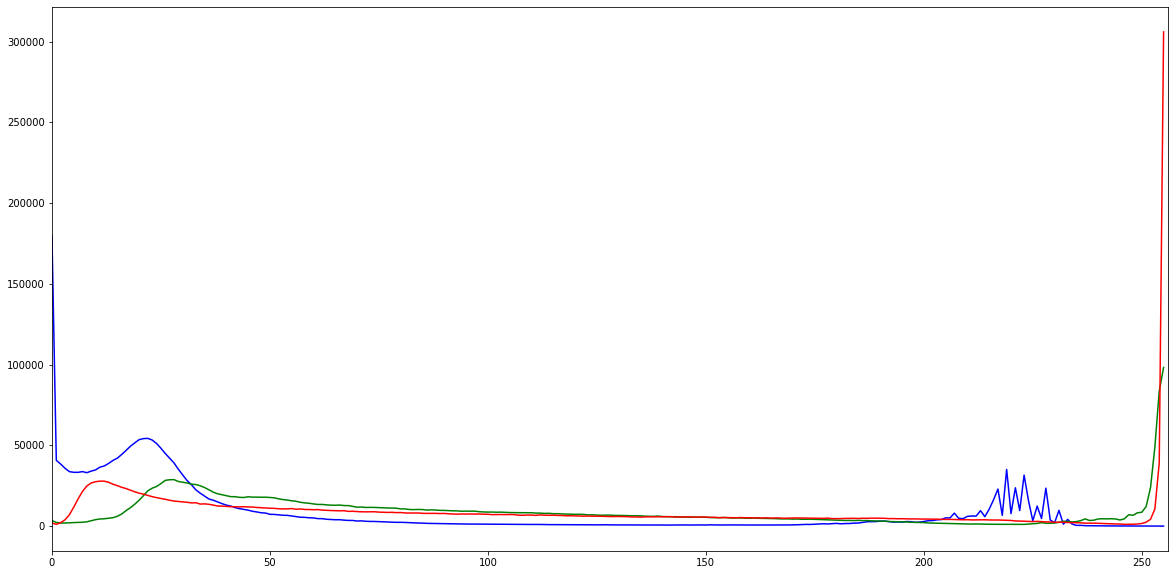

In [3]:
img = cv2.imread('./MasterOpenCV/images/tobago.jpg')

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure(figsize=(20,10))
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

color = ('b', 'g', 'r')
plt.figure(figsize=(20,10))
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [4]:
image = cv2.imread('./MasterOpenCV/images/tobago.jpg')
cv2.imshow("Tobago", image) 

cv2.waitKey(0)
cv2.destroyAllWindows()

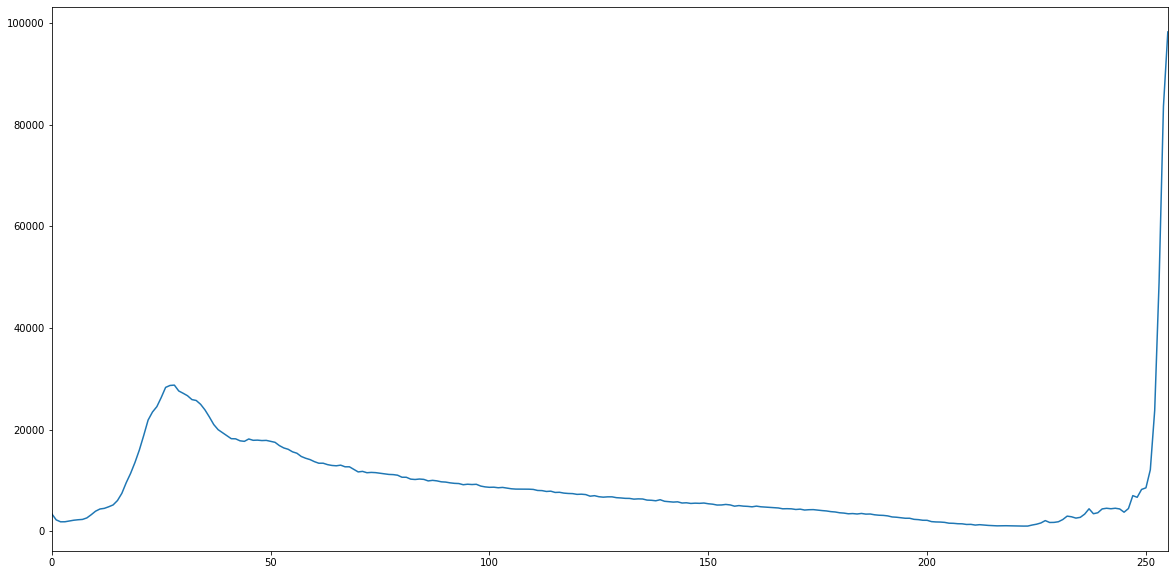

In [6]:
img2 = cv2.imread('./MasterOpenCV/images/tobago.jpg')
histogram = cv2.calcHist([img2], [1], None, [256], [0, 256])
plt.figure(figsize=(20,10))
plt.plot(histogram)
plt.xlim([0,255])
plt.show()

This is the use of equalizeHist

In [13]:
img = cv2.imread('./MasterOpenCV/images/Unequalized.jpg')
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
cv2.imshow('Source image', src)
cv2.imshow('Equalized Image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

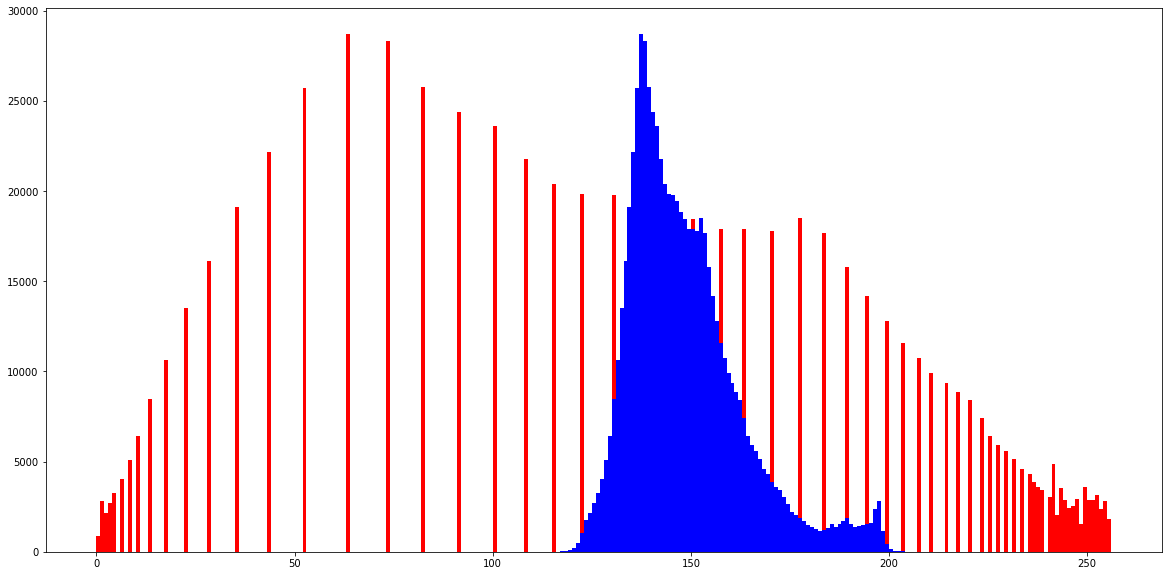

In [14]:
histogram1 = cv2.calcHist([src], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([dst], [0], None, [256], [0, 256])
plt.figure(figsize=(20,10))
plt.hist(dst.ravel(), 256, [0, 256], color = 'r')
plt.hist(src.ravel(), 256, [0, 256], color = 'b')
plt.show()

Superb thing
https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html

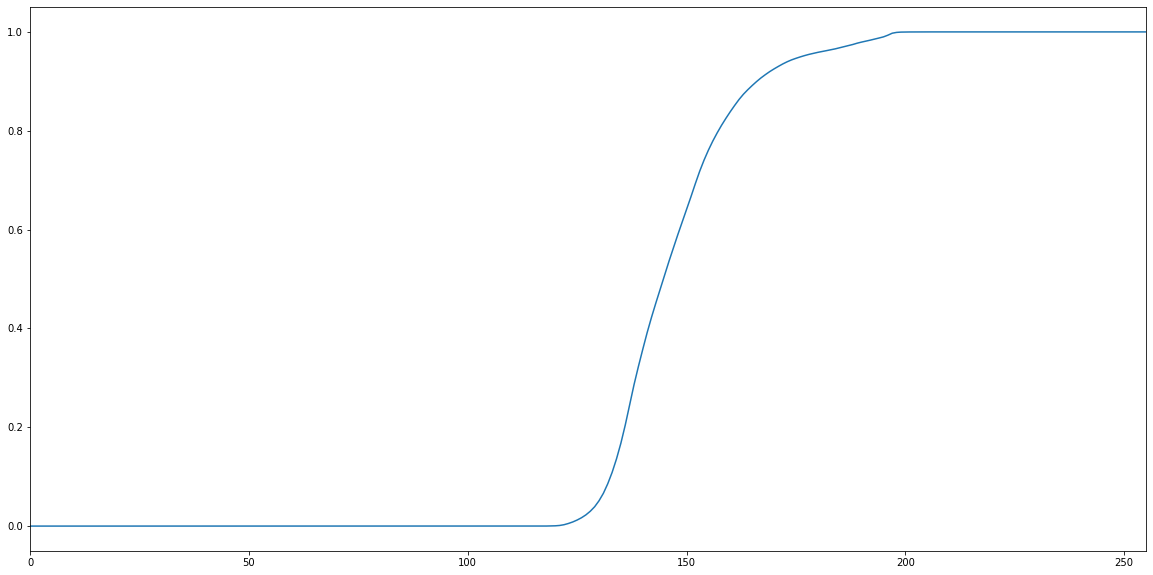

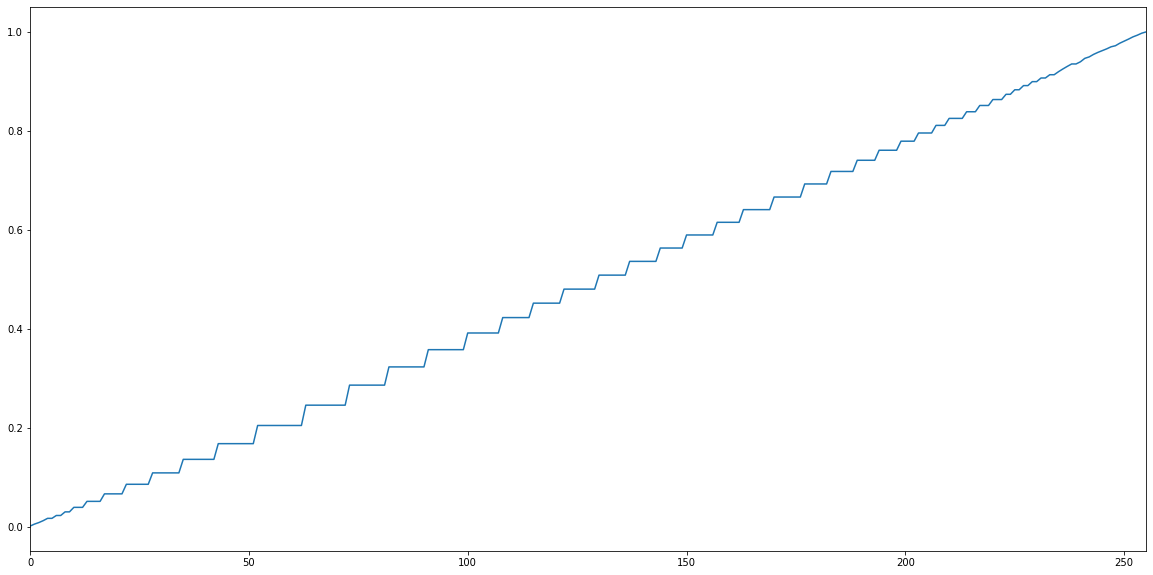

In [23]:
cdf(src)
cdf(dst)

In [ ]:
cv2.imwrite('Tobago_Grayscale.jpg', src)
cv2.imwrite('Tobago_Normalized.jpg', dst)